In [ ]:
pip install patool


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
 import patoolib

In [ ]:
patoolib.extract_archive('/content/drive/MyDrive/EuroSAT (1).zip')

patool: Extracting /content/drive/MyDrive/EuroSAT (1).zip ...
patool: running /usr/bin/7z x -o./Unpack_mtyg6bhk -- "/content/drive/MyDrive/EuroSAT (1).zip"
patool: ... /content/drive/MyDrive/EuroSAT (1).zip extracted to `2750'.


'2750'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from __future__ import print_function
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from keras.optimizers import RMSprop, Adam, SGD, Adadelta
from keras.utils import plot_model
from keras import backend as K
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from skimage.color import rgb2gray
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict
import glob
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,ZeroPadding2D
from keras import activations



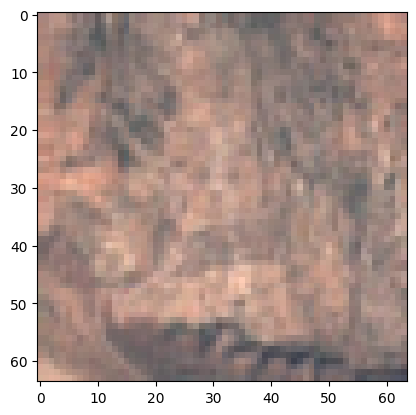

In [ ]:
imgdir='/content/2750'
imgfiles = []
imgfiles = [os.path.normpath(file) for file in glob.glob(imgdir + os.sep + "*" + os.sep + "*.jpg")]

# plot the first img
tmpimg = imread(imgfiles[1])
imshow(tmpimg)
show()

In [ ]:
eurosat = []
eurosat_label = []
for row in imgfiles:
  tmpimg = imread(row)
  gray_img = rgb2gray(tmpimg).reshape(1, 4096).squeeze().flatten() #flatten and convert to gray scale
  eurosat.append(gray_img) #append to the feature data set
  label = row.split("/")[3]
  eurosat_label.append(label) #append to the label list

In [ ]:
len(eurosat)

27000

In [ ]:
eurosat_f = np.vstack(eurosat)
eurosat_label_f = np.vstack(eurosat_label).reshape(27000,)

In [ ]:
# load images
G_eurosat = []
for row in imgfiles:
  tmpimg = imread(row)
  G_eurosat.append(tmpimg) #append to the feature data set


G_eurosat_f = np.stack(G_eurosat)
input_shape = (64, 64, 3)

In [ ]:
# change label to integers
dictionary = {"AnnualCrop":0, "Forest":1, "HerbaceousVegetation":2, "Highway":3,
              "Industrial":4, "Pasture":5, "PermanentCrop":6, "Residential":7, "River":8, "SeaLake":9}
eurosat_label_f = [dictionary[letter] for letter in eurosat_label_f]

eurosat_label_f = np.vstack(eurosat_label_f).reshape(27000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(G_eurosat_f, eurosat_label_f,
        stratify = eurosat_label_f, train_size = 0.8, random_state= 10)

X_train.shape

(21600, 64, 64, 3)

In [ ]:
# set global params
batch_size = 500
num_classes = 10
epochs = 30
CLASS_MODE = 'categorical'

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(21600, 10)

In [ ]:
X_train = X_train/225.0
X_test = X_test/225.0

In [ ]:

# Define input shape
IMAGE_SHAPE = [64,64]
base_model = VGG16(input_shape=IMAGE_SHAPE+[3], weights='imagenet', include_top=False)
base_model.summary()

x = base_model.layers[0].output

# Add new CNN layers with max pooling after each layer
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = ZeroPadding2D(padding=1)(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu')(x)
x = activations.relu(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

# Flatten the output and add fully connected layers
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=10, activation='softmax')(x)

# Create a new model with the modified architecture
model = Model(inputs=base_model.input, outputs=x)
model.summary()


In [ ]:
import tensorflow as tf
adam=tf.keras.optimizers.Adam(learning_rate=0.001,weight_decay=None,ema_momentum=0.9)

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score


metrics = [
    keras.metrics.BinaryAccuracy(name="binary_acc"),
    keras.metrics.AUC(name="AUC"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=metrics)

callbacks = [
              ModelCheckpoint("model_at_epoch_{epoch}.h9"),
              ReduceLROnPlateau(monitor='val_loss',
                             patience=2,
                             verbose=1,
                             factor=0.07,
                             min_lr=1e-9),
             EarlyStopping(monitor='val_loss', patience=3, verbose=1)
]

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=30,
                    callbacks=callbacks,
                    validation_split=0.2,
                    verbose=1,
                   )


Epoch 1/30
540/540 [==============================] - ETA: 0s - loss: 1.9745 - binary_acc: 0.9000 - AUC: 0.7325 - precision: 0.4984 - recall: 0.0351

540/540 [==============================] - 30s 36ms/step - loss: 1.9745 - binary_acc: 0.9000 - AUC: 0.7325 - precision: 0.4984 - recall: 0.0351 - val_loss: 1.6622 - val_binary_acc: 0.9000 - val_AUC: 0.8345 - val_precision: 0.5000 - val_recall: 0.0079 - lr: 0.0010
Epoch 2/30
540/540 [==============================] - ETA: 0s - loss: 1.4592 - binary_acc: 0.9052 - AUC: 0.8778 - precision: 0.5916 - recall: 0.1674

540/540 [==============================] - 18s 34ms/step - loss: 1.4592 - binary_acc: 0.9052 - AUC: 0.8778 - precision: 0.5916 - recall: 0.1674 - val_loss: 1.2795 - val_binary_acc: 0.9158 - val_AUC: 0.9071 - val_precision: 0.6465 - val_recall: 0.3484 - lr: 0.0010
Epoch 3/30
539/540 [============================>.] - ETA: 0s - loss: 1.0981 - binary_acc: 0.9291 - AUC: 0.9319 - precision: 0.7455 - recall: 0.4418

540/540 [==============================] - 17s 31ms/step - loss: 1.0982 - binary_acc: 0.9291 - AUC: 0.9319 - precision: 0.7456 - recall: 0.4418 - val_loss: 1.0827 - val_binary_acc: 0.9293 - val_AUC: 0.9337 - val_precision: 0.7520 - val_recall: 0.4373 - lr: 0.0010
Epoch 4/30
538/540 [============================>.] - ETA: 0s - loss: 0.8576 - binary_acc: 0.9430 - AUC: 0.9582 - precision: 0.7977 - recall: 0.5757

540/540 [==============================] - 18s 32ms/step - loss: 0.8563 - binary_acc: 0.9431 - AUC: 0.9583 - precision: 0.7983 - recall: 0.5764 - val_loss: 0.8075 - val_binary_acc: 0.9471 - val_AUC: 0.9624 - val_precision: 0.8041 - val_recall: 0.6231 - lr: 0.0010
Epoch 5/30
539/540 [============================>.] - ETA: 0s - loss: 0.7451 - binary_acc: 0.9505 - AUC: 0.9679 - precision: 0.8175 - recall: 0.6500

540/540 [==============================] - 17s 32ms/step - loss: 0.7452 - binary_acc: 0.9505 - AUC: 0.9679 - precision: 0.8172 - recall: 0.6499 - val_loss: 0.7936 - val_binary_acc: 0.9468 - val_AUC: 0.9635 - val_precision: 0.7814 - val_recall: 0.6495 - lr: 0.0010
Epoch 6/30
539/540 [============================>.] - ETA: 0s - loss: 0.6674 - binary_acc: 0.9547 - AUC: 0.9738 - precision: 0.8299 - recall: 0.6876

540/540 [==============================] - 18s 33ms/step - loss: 0.6670 - binary_acc: 0.9547 - AUC: 0.9738 - precision: 0.8301 - recall: 0.6878 - val_loss: 0.6587 - val_binary_acc: 0.9560 - val_AUC: 0.9747 - val_precision: 0.8391 - val_recall: 0.6928 - lr: 0.0010
Epoch 7/30
540/540 [==============================] - ETA: 0s - loss: 0.6318 - binary_acc: 0.9577 - AUC: 0.9763 - precision: 0.8389 - recall: 0.7146

540/540 [==============================] - 18s 33ms/step - loss: 0.6318 - binary_acc: 0.9577 - AUC: 0.9763 - precision: 0.8389 - recall: 0.7146 - val_loss: 0.6901 - val_binary_acc: 0.9539 - val_AUC: 0.9716 - val_precision: 0.8180 - val_recall: 0.6928 - lr: 0.0010
Epoch 8/30
538/540 [============================>.] - ETA: 0s - loss: 0.5838 - binary_acc: 0.9609 - AUC: 0.9798 - precision: 0.8511 - recall: 0.7383


Epoch 8: ReduceLROnPlateau reducing learning rate to 7.00000033248216e-05.
540/540 [==============================] - 17s 31ms/step - loss: 0.5839 - binary_acc: 0.9609 - AUC: 0.9798 - precision: 0.8510 - recall: 0.7383 - val_loss: 0.6650 - val_binary_acc: 0.9555 - val_AUC: 0.9744 - val_precision: 0.8217 - val_recall: 0.7083 - lr: 0.0010
Epoch 9/30
540/540 [==============================] - ETA: 0s - loss: 0.4327 - binary_acc: 0.9707 - AUC: 0.9884 - precision: 0.8908 - recall: 0.8060

540/540 [==============================] - 19s 35ms/step - loss: 0.4327 - binary_acc: 0.9707 - AUC: 0.9884 - precision: 0.8908 - recall: 0.8060 - val_loss: 0.5348 - val_binary_acc: 0.9635 - val_AUC: 0.9823 - val_precision: 0.8535 - val_recall: 0.7671 - lr: 7.0000e-05
Epoch 10/30
538/540 [============================>.] - ETA: 0s - loss: 0.4064 - binary_acc: 0.9723 - AUC: 0.9896 - precision: 0.8928 - recall: 0.8215

540/540 [==============================] - 17s 31ms/step - loss: 0.4066 - binary_acc: 0.9723 - AUC: 0.9896 - precision: 0.8927 - recall: 0.8215 - val_loss: 0.5291 - val_binary_acc: 0.9641 - val_AUC: 0.9824 - val_precision: 0.8525 - val_recall: 0.7757 - lr: 7.0000e-05
Epoch 11/30
540/540 [==============================] - ETA: 0s - loss: 0.3916 - binary_acc: 0.9731 - AUC: 0.9901 - precision: 0.8937 - recall: 0.8293

540/540 [==============================] - 18s 33ms/step - loss: 0.3916 - binary_acc: 0.9731 - AUC: 0.9901 - precision: 0.8937 - recall: 0.8293 - val_loss: 0.5296 - val_binary_acc: 0.9649 - val_AUC: 0.9824 - val_precision: 0.8577 - val_recall: 0.7782 - lr: 7.0000e-05
Epoch 12/30
539/540 [============================>.] - ETA: 0s - loss: 0.3789 - binary_acc: 0.9742 - AUC: 0.9906 - precision: 0.8995 - recall: 0.8351

540/540 [==============================] - 17s 32ms/step - loss: 0.3791 - binary_acc: 0.9742 - AUC: 0.9906 - precision: 0.8994 - recall: 0.8349 - val_loss: 0.5168 - val_binary_acc: 0.9663 - val_AUC: 0.9829 - val_precision: 0.8590 - val_recall: 0.7928 - lr: 7.0000e-05
Epoch 13/30
540/540 [==============================] - ETA: 0s - loss: 0.3713 - binary_acc: 0.9748 - AUC: 0.9911 - precision: 0.9019 - recall: 0.8396

540/540 [==============================] - 18s 34ms/step - loss: 0.3713 - binary_acc: 0.9748 - AUC: 0.9911 - precision: 0.9019 - recall: 0.8396 - val_loss: 0.5167 - val_binary_acc: 0.9665 - val_AUC: 0.9830 - val_precision: 0.8591 - val_recall: 0.7949 - lr: 7.0000e-05
Epoch 14/30
538/540 [============================>.] - ETA: 0s - loss: 0.3568 - binary_acc: 0.9753 - AUC: 0.9917 - precision: 0.9019 - recall: 0.8454

540/540 [==============================] - 17s 32ms/step - loss: 0.3571 - binary_acc: 0.9753 - AUC: 0.9917 - precision: 0.9018 - recall: 0.8453 - val_loss: 0.5153 - val_binary_acc: 0.9669 - val_AUC: 0.9834 - val_precision: 0.8585 - val_recall: 0.8007 - lr: 7.0000e-05
Epoch 15/30
538/540 [============================>.] - ETA: 0s - loss: 0.3479 - binary_acc: 0.9763 - AUC: 0.9920 - precision: 0.9052 - recall: 0.8519

540/540 [==============================] - 17s 32ms/step - loss: 0.3477 - binary_acc: 0.9763 - AUC: 0.9920 - precision: 0.9052 - recall: 0.8520 - val_loss: 0.5160 - val_binary_acc: 0.9667 - val_AUC: 0.9831 - val_precision: 0.8583 - val_recall: 0.7991 - lr: 7.0000e-05
Epoch 16/30
539/540 [============================>.] - ETA: 0s - loss: 0.3345 - binary_acc: 0.9772 - AUC: 0.9926 - precision: 0.9090 - recall: 0.8576

540/540 [==============================] - 18s 34ms/step - loss: 0.3348 - binary_acc: 0.9771 - AUC: 0.9926 - precision: 0.9089 - recall: 0.8575 - val_loss: 0.5136 - val_binary_acc: 0.9677 - val_AUC: 0.9834 - val_precision: 0.8616 - val_recall: 0.8067 - lr: 7.0000e-05
Epoch 17/30
540/540 [==============================] - ETA: 0s - loss: 0.3247 - binary_acc: 0.9782 - AUC: 0.9929 - precision: 0.9142 - recall: 0.8626

540/540 [==============================] - 18s 33ms/step - loss: 0.3247 - binary_acc: 0.9782 - AUC: 0.9929 - precision: 0.9142 - recall: 0.8626 - val_loss: 0.5283 - val_binary_acc: 0.9665 - val_AUC: 0.9820 - val_precision: 0.8540 - val_recall: 0.8016 - lr: 7.0000e-05
Epoch 18/30
539/540 [============================>.] - ETA: 0s - loss: 0.3139 - binary_acc: 0.9788 - AUC: 0.9932 - precision: 0.9161 - recall: 0.8675


Epoch 18: ReduceLROnPlateau reducing learning rate to 4.900000130874105e-06.
540/540 [==============================] - 17s 32ms/step - loss: 0.3137 - binary_acc: 0.9788 - AUC: 0.9932 - precision: 0.9162 - recall: 0.8675 - val_loss: 0.5245 - val_binary_acc: 0.9668 - val_AUC: 0.9821 - val_precision: 0.8576 - val_recall: 0.8005 - lr: 7.0000e-05
Epoch 19/30
539/540 [============================>.] - ETA: 0s - loss: 0.2947 - binary_acc: 0.9801 - AUC: 0.9941 - precision: 0.9224 - recall: 0.8741

540/540 [==============================] - 18s 33ms/step - loss: 0.2946 - binary_acc: 0.9800 - AUC: 0.9941 - precision: 0.9223 - recall: 0.8741 - val_loss: 0.5162 - val_binary_acc: 0.9675 - val_AUC: 0.9829 - val_precision: 0.8600 - val_recall: 0.8060 - lr: 4.9000e-06
Epoch 19: early stopping


In [ ]:
def plot_metrics(history, name, bot=0.0, top=0.0):
    plt.plot(history.history[name])
    plt.plot(history.history['val_'+name])
    plt.title('Model '+name)
    plt.ylabel(name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    if top != 0.0:
        plt.ylim([bot, top])
    plt.show()

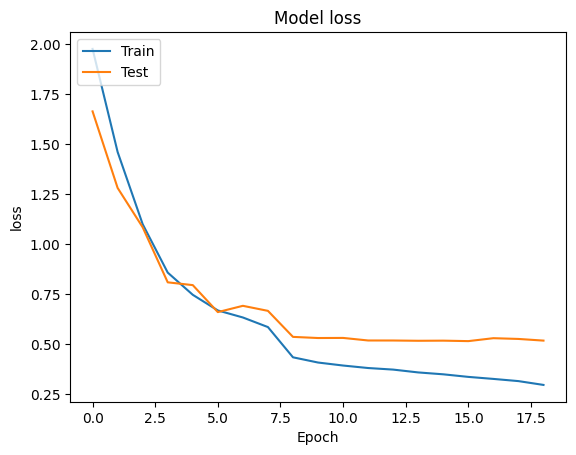

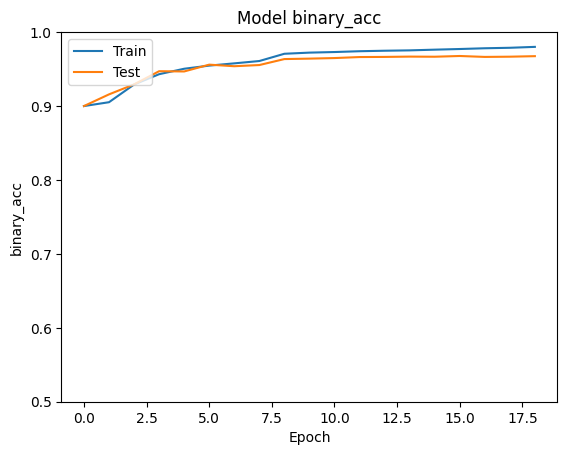

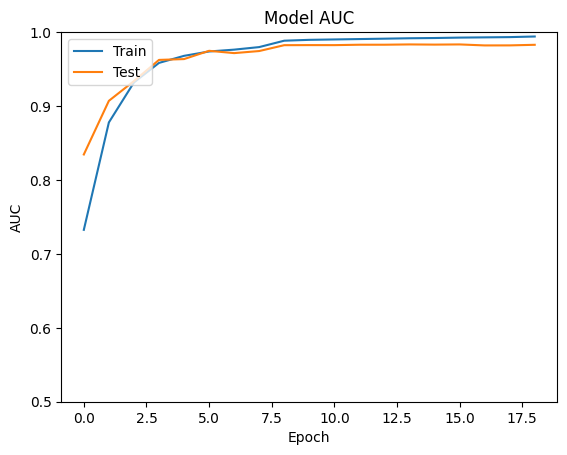

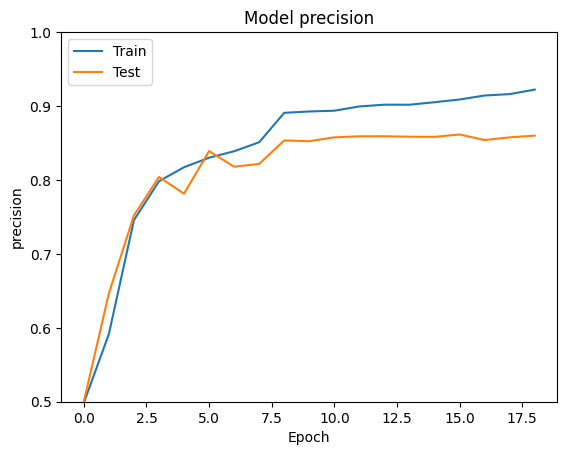

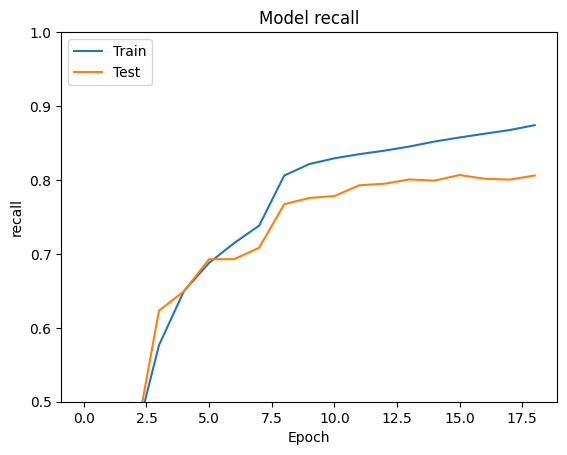

In [ ]:
plot_metrics(history, 'loss')
for i in range(len(metrics)):
    plot_metrics(history, metrics[i].name, 0.5, 1.0)

In [ ]:
model.evaluate(X_test, y_test)

169/169 [==============================] - 3s 12ms/step - loss: 0.5174 - binary_acc: 0.9676 - AUC: 0.9824 - precision: 0.8597 - recall: 0.8081


[0.5174335241317749,
 0.967629611492157,
 0.9823870658874512,
 0.8597320914268494,
 0.8081481456756592]

In [ ]:
Y_pred = model.predict(X_test)

169/169 [==============================] - 1s 6ms/step


In [ ]:
y_pred = np.rint(Y_pred)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_test = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
report


'              precision    recall  f1-score   support\n\n           0       0.59      0.90      0.71       600\n           1       0.96      0.94      0.95       600\n           2       0.79      0.72      0.75       600\n           3       0.73      0.58      0.65       500\n           4       0.91      0.94      0.92       500\n           5       0.80      0.77      0.78       400\n           6       0.72      0.61      0.66       500\n           7       0.94      0.94      0.94       600\n           8       0.77      0.67      0.72       500\n           9       0.98      0.98      0.98       600\n\n    accuracy                           0.81      5400\n   macro avg       0.82      0.80      0.81      5400\nweighted avg       0.82      0.81      0.81      5400\n'

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred,average=None)

array([0.71125828, 0.95037847, 0.75261324, 0.64738598, 0.92307692,
       0.7826087 , 0.66019417, 0.94068505, 0.71931697, 0.97911445])

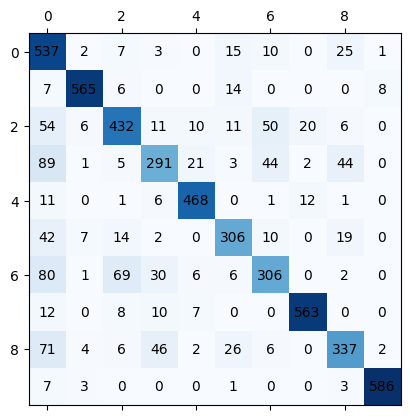

In [ ]:
#Confusion_Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(conf_matrix, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_matrix):
    plt.text(j, i, z, ha='center', va='center')